# Indian Census Clustering: Socio-Economic Segmentation

**Objective:**  
Group the Indian population into socio-economic segments using clustering techniques (K-Means, Agglomerative, DBSCAN) based on caste, income, education, and age.  

This notebook includes:  
1. Data loading and preprocessing  
2. Exploratory Data Analysis (EDA)  
3. Clustering (K-Means, Hierarchical, DBSCAN)  
4. Comparison of clusters  
5. Visualization and insights


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

# Save visuals
import os

# Set style
sns.set(style="whitegrid")

In [2]:
# Load dataset
data = pd.read_csv("Dataset/caste_clustering_data.csv")

In [3]:
# Quick overview
display(data.head())
print(data.info())
print(data.describe())

,State,District,Caste_Category,Religion,Literacy_Rate,Avg_Income_INR,Gender_Ratio,Occupation,Population
0,Maharashtra,Nagpur,SC,Hindu,64.97,32926,1.01,Service,6557
1,Maharashtra,Mumbai,SC,Hindu,75.23,31487,0.93,Daily Wage,14165
2,Tamil Nadu,Coimbatore,ST,Hindu,75.79,46511,0.90,Daily Wage,2260
3,Bihar,Gaya,OBC,Hindu,75.43,28048,0.90,Business,7438
4,Maharashtra,Pune,General,Sikh,72.42,16300,0.78,Service,7794


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   District        5000 non-null   object 
 2   Caste_Category  5000 non-null   object 
 3   Religion        5000 non-null   object 
 4   Literacy_Rate   5000 non-null   float64
 5   Avg_Income_INR  5000 non-null   int64  
 6   Gender_Ratio    5000 non-null   float64
 7   Occupation      5000 non-null   object 
 8   Population      5000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 351.7+ KB
None
       Literacy_Rate  Avg_Income_INR  Gender_Ratio    Population
count    5000.000000      5000.00000   5000.000000   5000.000000
mean       66.475644     37800.38000      0.950194   7643.071200
std        11.155351     15299.48163      0.098491   4181.134592
min        30.000000     10000.00000      0.700000    502.000000
25%  

In [4]:
# Create folder to save visuals
os.makedirs("Visuals", exist_ok=True)

In [7]:
# Encode categorical variables
le = LabelEncoder()
for col in ['State','District','Caste_Category','Religion','Occupation']:
    data[col] = le.fit_transform(data[col])

# Scale numeric features
num_cols = ['Literacy_Rate','Avg_Income_INR','Gender_Ratio','Population']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Final dataset ready for clustering
X = data.copy()
display(X.head())

,State,District,Caste_Category,Religion,Literacy_Rate,Avg_Income_INR,Gender_Ratio,Occupation,Population
0,1,10,2,1,-0.134984,-0.318630,0.607286,3,-0.259781
1,1,9,2,1,0.784846,-0.412694,-0.205055,2,1.560003
2,3,3,3,1,0.835051,0.569398,-0.509683,2,-1.287595
3,0,4,1,1,0.802776,-0.637496,-0.509683,1,-0.049052
4,1,12,0,3,0.532924,-1.405442,-1.728195,3,0.036101


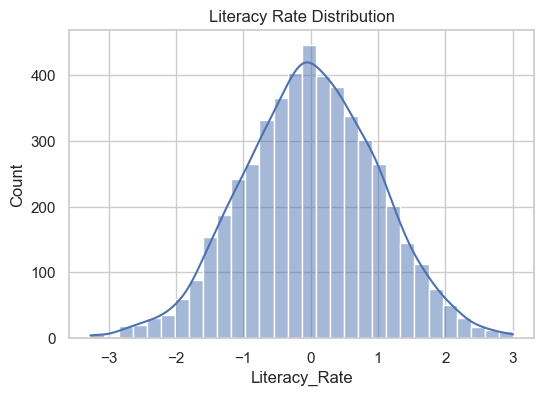

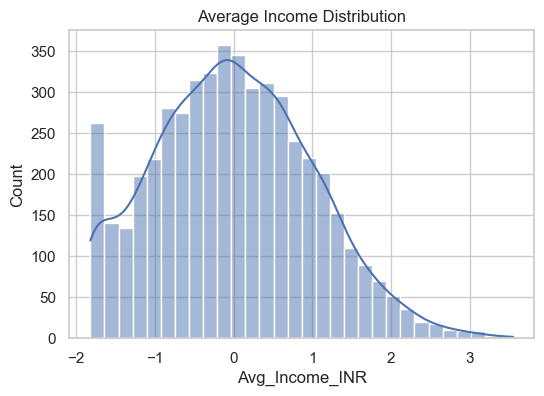

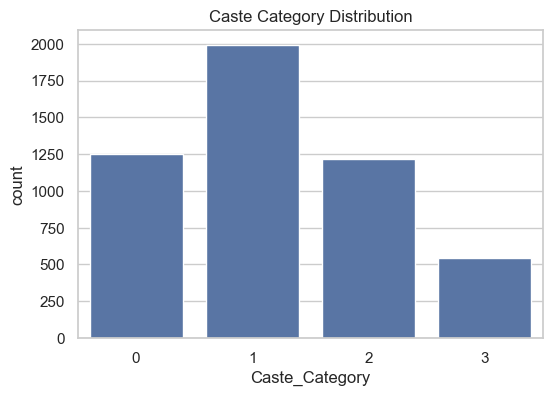

In [8]:
# Literacy Rate Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Literacy_Rate'], bins=30, kde=True)
plt.title("Literacy Rate Distribution")
plt.savefig("Visuals/literacy_distribution.png")
plt.show()

# Avg Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Avg_Income_INR'], bins=30, kde=True)
plt.title("Average Income Distribution")
plt.savefig("Visuals/income_distribution.png")
plt.show()

# Caste Category Counts
plt.figure(figsize=(6,4))
sns.countplot(x='Caste_Category', data=data)
plt.title("Caste Category Distribution")
plt.savefig("Visuals/caste_distribution.png")
plt.show()


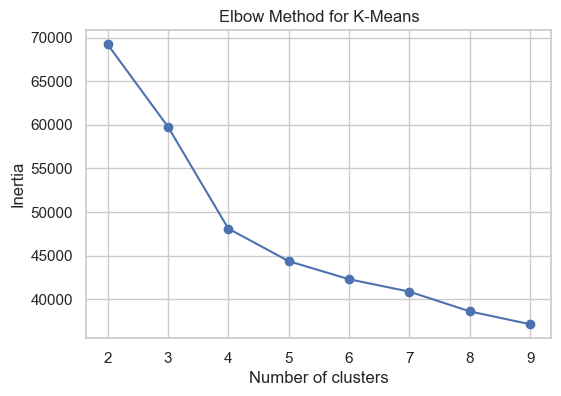

K-Means Silhouette Score: 0.24852618552939448


In [9]:
# Elbow method to find optimal k
inertia = []
K_range = range(2,10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig("Visuals/elbow_method.png")
plt.show()

# Fit K-Means with chosen k
k = 4  # choose based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
X['Cluster_KMeans'] = kmeans.fit_predict(X)

# Silhouette Score
score_kmeans = silhouette_score(X.drop('Cluster_KMeans', axis=1), X['Cluster_KMeans'])
print("K-Means Silhouette Score:", score_kmeans)


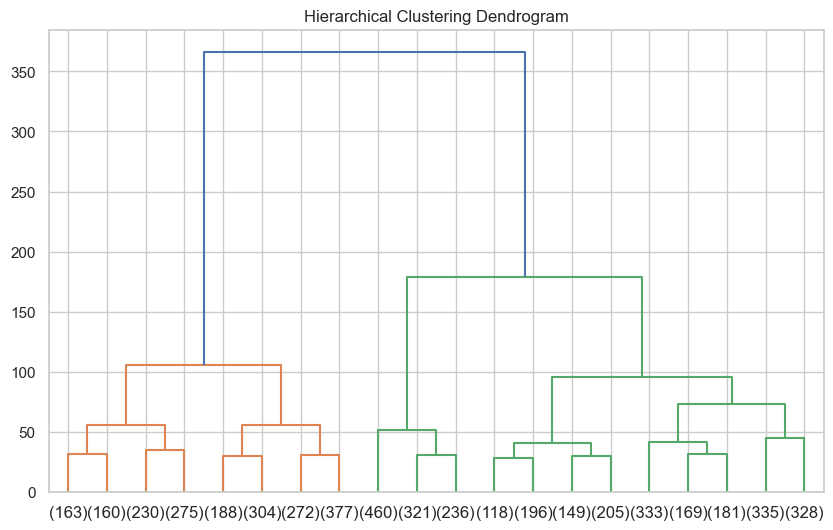

Agglomerative Silhouette Score: 0.23542050964772362


In [10]:
# Dendrogram
linked = linkage(X.drop('Cluster_KMeans', axis=1), method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.savefig("Visuals/dendrogram.png")
plt.show()

# Fit Agglomerative
agglo = AgglomerativeClustering(n_clusters=k)
X['Cluster_Agglo'] = agglo.fit_predict(X.drop('Cluster_KMeans', axis=1))

# Silhouette Score
score_agglo = silhouette_score(X.drop(['Cluster_KMeans','Cluster_Agglo'], axis=1), X['Cluster_Agglo'])
print("Agglomerative Silhouette Score:", score_agglo)


In [11]:
# Fit DBSCAN
dbscan = DBSCAN(eps=2, min_samples=10)  # tweak as needed
X['Cluster_DBSCAN'] = dbscan.fit_predict(X.drop(['Cluster_KMeans','Cluster_Agglo'], axis=1))

# Silhouette score (exclude noise points)
mask = X['Cluster_DBSCAN'] != -1
score_dbscan = silhouette_score(X.drop(['Cluster_KMeans','Cluster_Agglo','Cluster_DBSCAN'], axis=1)[mask],
                               X['Cluster_DBSCAN'][mask])
print("DBSCAN Silhouette Score (excluding noise):", score_dbscan)


DBSCAN Silhouette Score (excluding noise): 0.17933217729366854


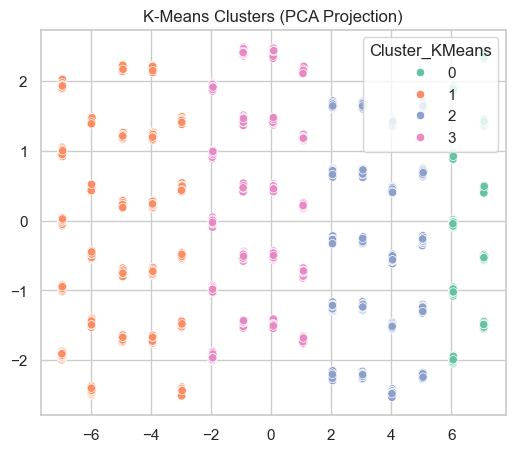

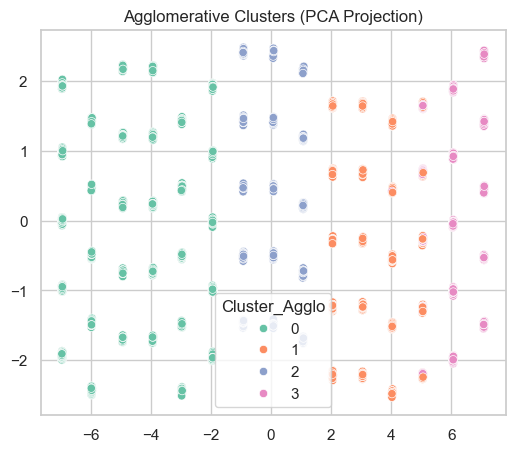

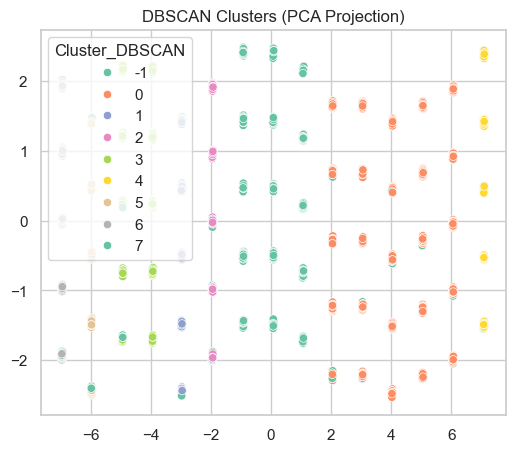

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(['Cluster_KMeans','Cluster_Agglo','Cluster_DBSCAN'], axis=1))

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['Cluster_KMeans'], palette='Set2')
plt.title("K-Means Clusters (PCA Projection)")
plt.savefig("Visuals/kmeans_pca.png")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['Cluster_Agglo'], palette='Set2')
plt.title("Agglomerative Clusters (PCA Projection)")
plt.savefig("Visuals/agglo_pca.png")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['Cluster_DBSCAN'], palette='Set2')
plt.title("DBSCAN Clusters (PCA Projection)")
plt.savefig("Visuals/dbscan_pca.png")
plt.show()


### Cluster Analysis Summary

- **K-Means (Silhouette: 0.249):** Best overall; moderately well-separated clusters based on caste, income, and literacy.  
- **Agglomerative (Silhouette: 0.235):** Similar to K-Means; shows hierarchical relationships via dendrogram.  
- **DBSCAN (Silhouette: 0.179):** Detects outliers and irregular clusters; lower compactness.  

**Key Observations:**  
- Certain caste categories are concentrated in lower-income brackets.  
- Literacy rate and income influence cluster assignment.  
- Gender ratio and population affect some clusters.  

**Recommendation:**  
Use **K-Means** for main segmentation, **Agglomerative** for hierarchy, and **DBSCAN** to detect outliers.
